# Class 9: Audio Basics - Tutorial

In [37]:
# Basic Python imports
import os
import time
import platform

# Data handling
import numpy as np

# Plotting
import met_brewer                             # https://github.com/BlakeRMills/MetBrewer
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# Playing audio
import sounddevice as sd

# Processing audio
from scipy.io import wavfile
from scipy.signal import spectrogram

In [41]:
# # # # Working Directory # # # #

if platform.system() == 'Linux':
    rootwd = '/home/rask/'
else:
    rootwd = 'C:/Users/au535365/'

wd = os.path.join(rootwd, 'Dropbox/teaching/css_fall2023')
    
# Change directory
os.chdir(wd)

# Confirm that the working directory is as intended 
os.getcwd()

'/home/rask/Dropbox/teaching/css_fall2023'

In [8]:
# met_brewer.COLORBLIND_PALETTES

FileNotFoundError: [Errno 2] No such file or directory: 'images/sine_waves.pdf'

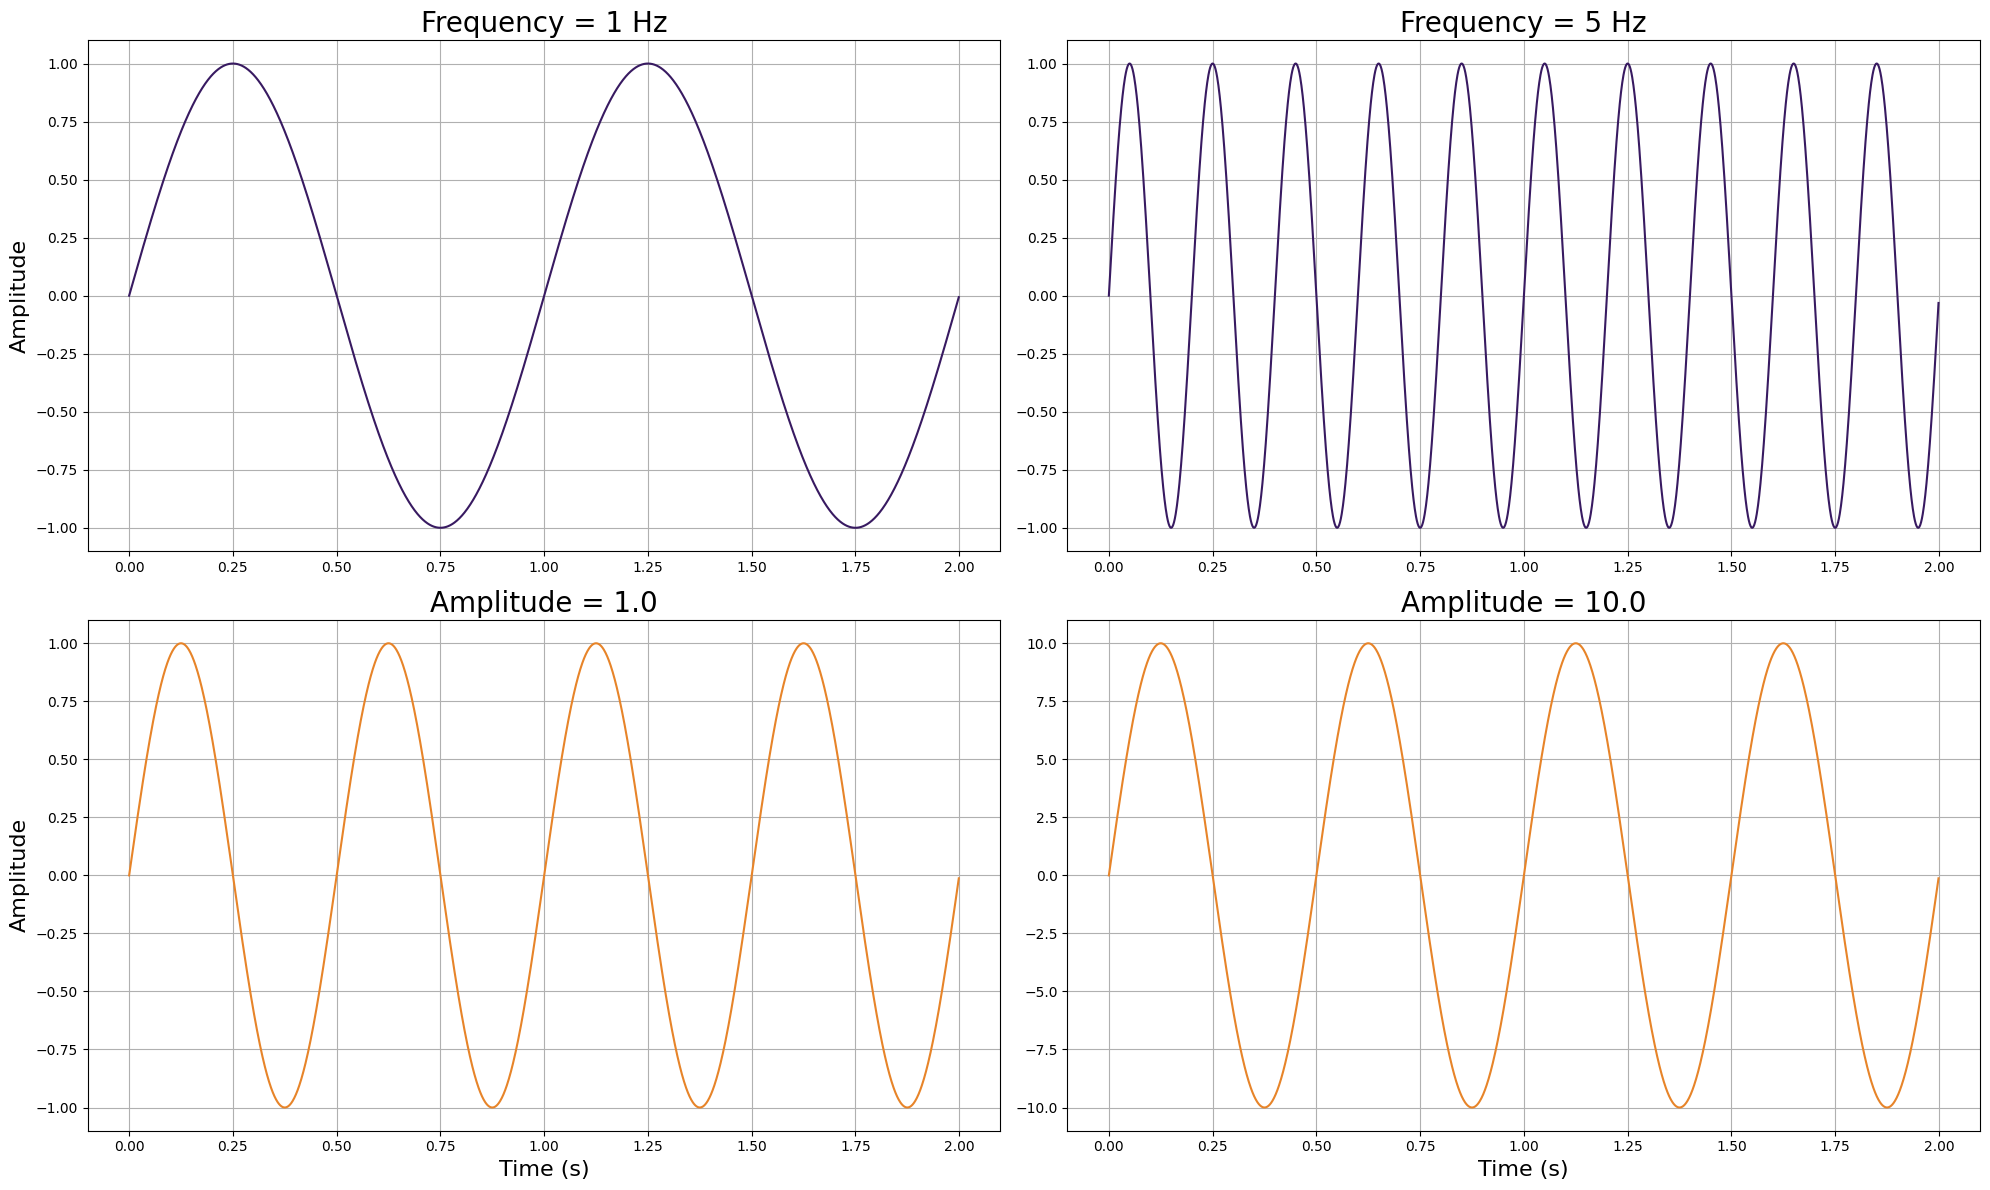

In [2]:
import numpy as np
import matplotlib.pyplot as plt

length = 2.0
sr = 1000

amplitude = 1.0

# Generate time values
t = np.linspace(0, length, int(length * sr), endpoint=False)

# Parameters for the first sine wave
freq1 = 1.0

# Parameters for the second sine wave
freq2 = 5.0  

# Generate the first sine wave
sine_wave1 = amplitude * np.sin(2 * np.pi * freq1 * t)

# Generate the second sine wave
sine_wave2 = amplitude * np.sin(2 * np.pi * freq2 * t)

# Define characterics of the amplitude varying plot
freq = 2.0
amp1 = 1.0
amp2 = 10.0

# Generate the first sine wave
sine_wave3 = amp1 * np.sin(2 * np.pi * freq * t)

# Generate the second sine wave
sine_wave4 = amp2 * np.sin(2 * np.pi * freq * t)

# Create subplots side by side
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed
plt.subplot(2, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(t, sine_wave1, color='#381a61')
plt.title('Frequency = 1 Hz', size=20)
#plt.xlabel('Time (s)', size=16)
plt.ylabel('Amplitude', size=16)
plt.grid(True)

plt.subplot(2, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(t, sine_wave2, color='#381a61')
plt.title('Frequency = 5 Hz', size=20)
#plt.xlabel('Time (s)', size=16)
#plt.ylabel('Amplitude', size=16)
plt.grid(True)

plt.subplot(2, 2, 3)  # 1 row, 2 columns, second subplot
plt.plot(t, sine_wave3, color='#e78429')
plt.title('Amplitude = 1.0', size=20)
plt.xlabel('Time (s)', size=16)
plt.ylabel('Amplitude', size=16)
plt.grid(True)

plt.subplot(2, 2, 4)  # 1 row, 2 columns, second subplot
plt.plot(t, sine_wave4, color='#e78429')
plt.title('Amplitude = 10.0', size=20)
plt.xlabel('Time (s)', size=16)
#plt.ylabel('Amplitude', size=16)
plt.grid(True)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.savefig('images/' + 'sine_waves.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
def plot_waveform(x, y, title, **kwargs):
    plt.plot(t, sine_wave1, color='#381a61')
    
    plt.title(title, size=20)
    
    if 'xtext' in kwargs.keys():
        plt.xlabel(kwargs['xtext'], size=16)
    if 'ytext' in kwargs.keys():
        plt.ylabel(kwargs['ytext'], size=16)
    
    plt.grid(True)

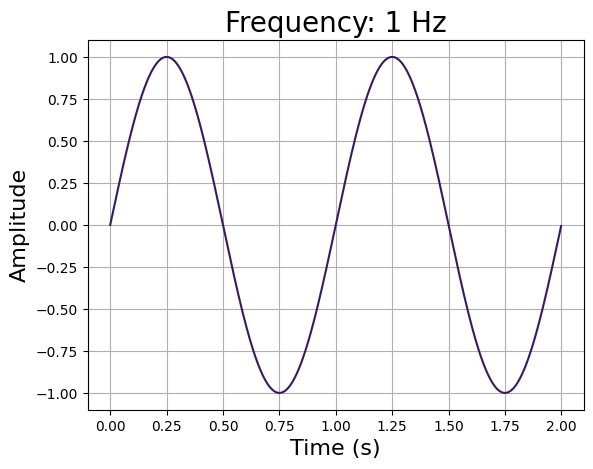

In [20]:
title = 'Frequency: 1 Hz'
plot_waveform(x=t, y=sine_wave1, title=title, xtext='Time (s)', ytext='Amplitude')

In [32]:
# Samples per second
sps = 44100

# Frequency / pitch
freq_hz = 40.0

# Duration
duration_s = 3.0

# Amplitude
amplitude = 2.0

# NumpPy magic to calculate the waveform
# Can you explain the code below? 
# What is each_sample_number? 
each_sample_number = np.arange(duration_s * sps)
waveform = amplitude * np.sin(2 * np.pi * each_sample_number * freq_hz / sps)

# Play the waveform out the speakers
sd.play(waveform, sps)
time.sleep(duration_s)
sd.stop()

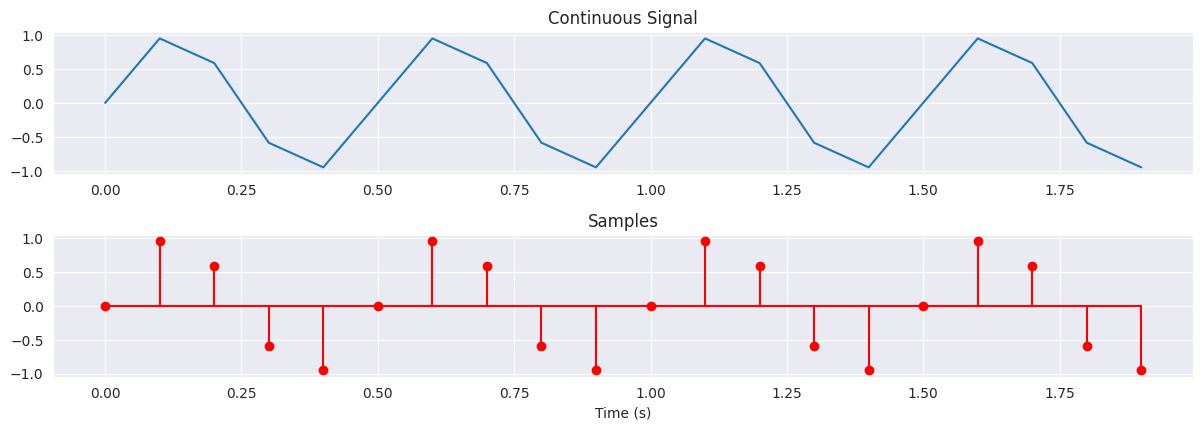

In [34]:
# Continuous-time signal parameters
frequency = 2.0  # Frequency of the sine wave (Hz)
duration_s = 2.0  # Duration of the continuous signal in seconds

# Sampling parameters
fs = 10.0  # Sampling frequency (samples per second)
Ts = 1.0 / fs  # Sampling period

# Create time values for the continuous signal
t_continuous = np.linspace(0, duration_s, int(duration_s * fs), endpoint=False)

# Create the continuous signal (a sine wave in this case)
continuous_signal = np.sin(2 * np.pi * frequency * t_continuous)

# Create discrete-time sample indices (n values)
n_values = np.arange(int(duration_s * fs))

# Initialize the discrete-time signal to zeros
discrete_signal = np.zeros(len(n_values))

# Sample the continuous signal using the mathematical formula
for n in n_values:
    t_sample = n * Ts  # Calculate the time instant for sampling
    discrete_signal[n] = np.sin(2 * np.pi * frequency * t_sample)

# Plot the continuous, sampled, and quantized signals
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t_continuous, continuous_signal, label='Continuous Signal')
plt.title('Continuous Signal')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
plt.grid(True)
#plt.legend()

plt.subplot(3, 1, 2)
plt.stem(n_values * Ts, discrete_signal, markerfmt='ro', basefmt='r', linefmt='-r', label='Discrete Samples')
plt.title('Samples')
plt.xlabel('Time (s)')
plt.grid(True)
plt.tight_layout()

plt.savefig('images/' + 'adsampling.pdf', dpi=300, bbox_inches='tight')

plt.show()

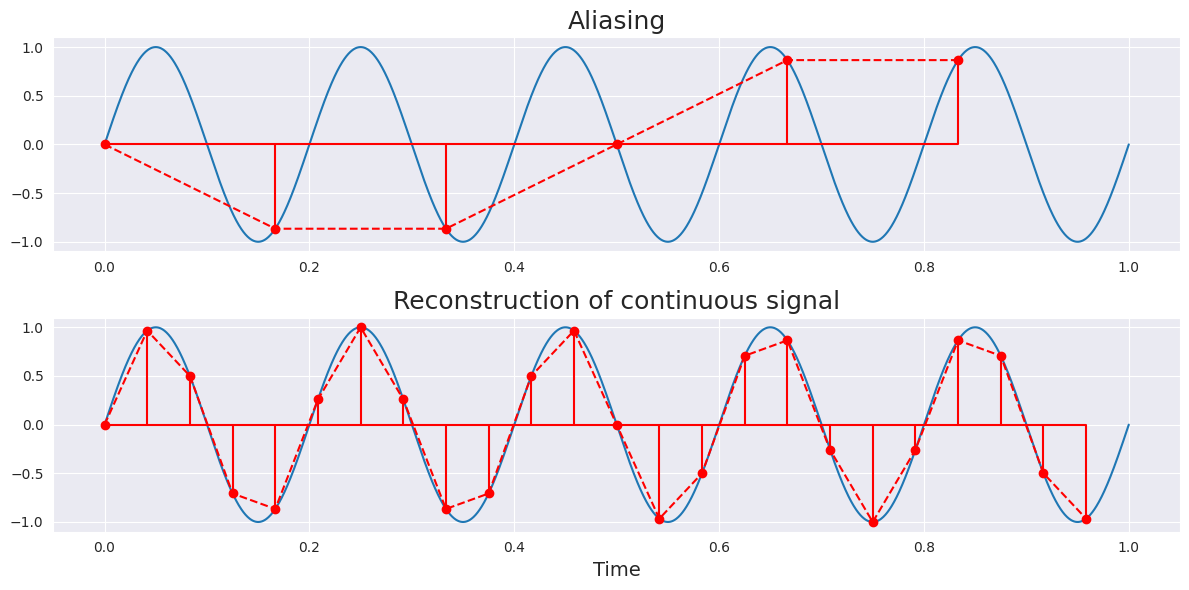

In [35]:
# Define the continuous signal (e.g., a sine wave)
frequency_signal = 5  # Frequency of the continuous signal (in Hz)
time = np.linspace(0, 1, 2000)  # Time vector for the continuous signal
continuous_signal = np.sin(2 * np.pi * frequency_signal * time)

# Define the sampling parameters
sampling_frequency_low = 6  # Sampling frequency (lower than the Nyquist rate)
sampling_period_low = 1 / sampling_frequency_low
sampled_time_low = np.arange(0, 1, sampling_period_low)
sampled_signal_low = np.sin(2 * np.pi * frequency_signal * sampled_time_low)

# Define the sampling parameters
sampling_frequency_high = 24  # Sampling frequency (lower than the Nyquist rate)
sampling_period_high = 1 / sampling_frequency_high
sampled_time_high = np.arange(0, 1, sampling_period_high)
sampled_signal_high = np.sin(2 * np.pi * frequency_signal * sampled_time_high)

# Create a single plot with the continuous signal and samples (Low Sampling Rate)
plt.figure(figsize=(12, 6))

# Plot the continuous signal
plt.subplot(2, 1, 1)
plt.plot(time, continuous_signal, label="Continuous Signal")
plt.title("Aliasing", size=18)
plt.grid(True)
plt.stem(sampled_time_low, sampled_signal_low, markerfmt='ro', linefmt='r-', basefmt="r-", label="Sampled Signal (Low Sampling Rate)")
plt.plot(sampled_time_low, sampled_signal_low, 'r--', label="Connected Samples")

plt.subplot(2, 1, 2)
plt.plot(time, continuous_signal)
plt.title("Reconstruction of continuous signal", size=18)
plt.xlabel("Time", size=14)
plt.grid(True)
plt.stem(sampled_time_high, sampled_signal_high, markerfmt='ro', linefmt='r-', basefmt="r-")
plt.plot(sampled_time_high, sampled_signal_high, 'r--', label="Connected Samples")
plt.tight_layout()

plt.savefig('images/' + 'alisiang.pdf', dpi=300, bbox_inches='tight')
plt.show()

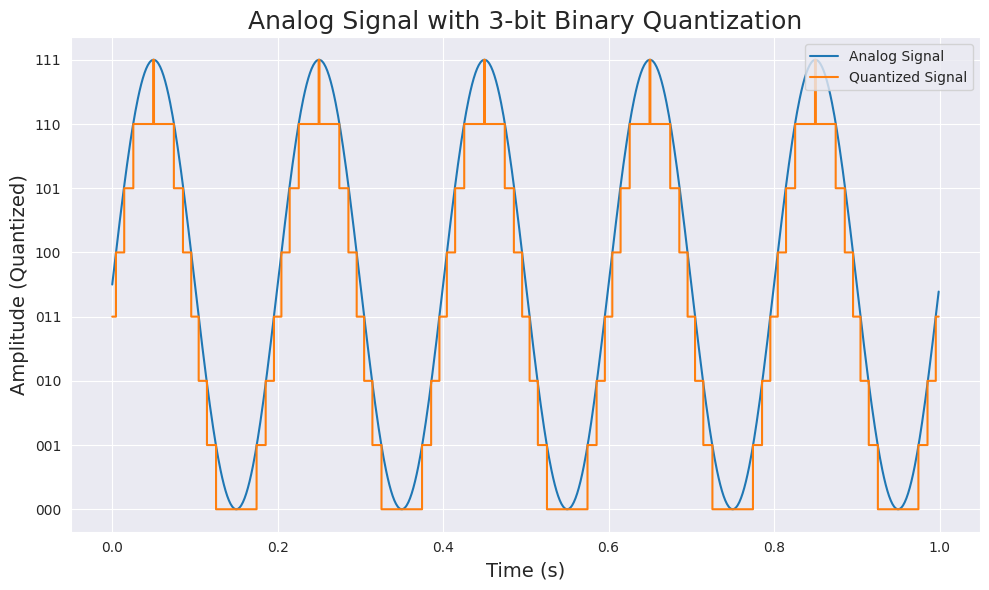

In [36]:
# Parameters
sampling_rate = 1000  # Sampling rate in Hz
duration = 1.0  # Duration of the signal in seconds
bit_depth = 3  # Bit depth (3 bits for quantization)

# Generate a continuous analog signal (e.g., a sine wave)
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
analog_signal = np.sin(2 * np.pi * 5 * t)  # A 5 Hz sine wave as an example

# Quantization process
quantization_levels = np.linspace(-1, 1, 2 ** bit_depth)
quantized_signal = np.digitize(analog_signal, quantization_levels) - 1

# Create a plot to visualize the quantization
plt.figure(figsize=(10, 6))

# Continuous Analog Signal
plt.plot(t, analog_signal, label="Analog Signal")
plt.title("Analog Signal with 3-bit Binary Quantization", size=18)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(False)

# Quantized Digital Signal (3-bit binary)
quantized_signal_values = [quantization_levels[i] for i in quantized_signal]
plt.step(t, quantized_signal_values, where='mid', label="Quantized Signal")
plt.xlabel("Time (s)", size=14)
plt.ylabel("Amplitude (Quantized)", size=14)
plt.yticks(quantization_levels, [f'{i:03b}' for i in range(2 ** bit_depth)])
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('images/' + 'quantization.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
sr, audio = wavfile.read(rootwd + 'Dropbox/polannote-paper/DE.wav')

In [43]:
start = 16000*154
end = 16000*164

start = sr * (180+15)
end = sr * (180+30)

In [44]:
samples = audio[start:end]
samples.shape

(240000,)

In [45]:
frequencies, times, spectrogram_data = spectrogram(samples, fs=sr)

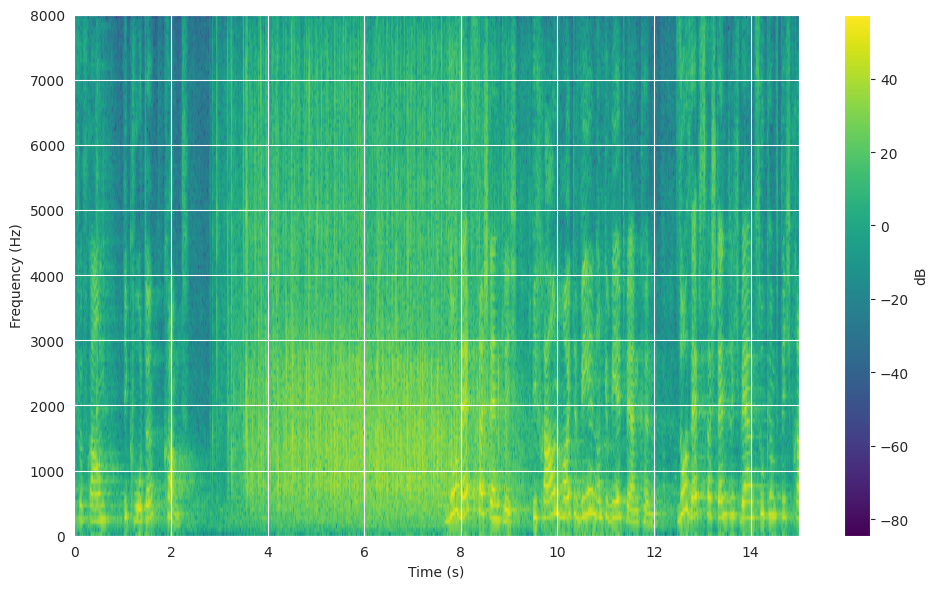

In [47]:
waveform = samples
sample_rate = sr

# Calculate the spectrogram
frequencies, times, spectrogram_data = spectrogram(waveform, fs=sample_rate)

# Create a time axis for the spectrogram
time_spectrogram = np.linspace(0, len(waveform) / sample_rate, len(times))

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(spectrogram_data), aspect='auto', cmap='viridis', origin='lower', extent=[time_spectrogram.min(), time_spectrogram.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Overlay the waveform
#plt.plot(np.linspace(0, len(waveform) / sample_rate, len(waveform)), waveform, color='red', alpha=0.7)
plt.tight_layout()
plt.savefig('images/' + 'applause_spectrogram.pdf', dpi=300, bbox_inches='tight')
plt.show()

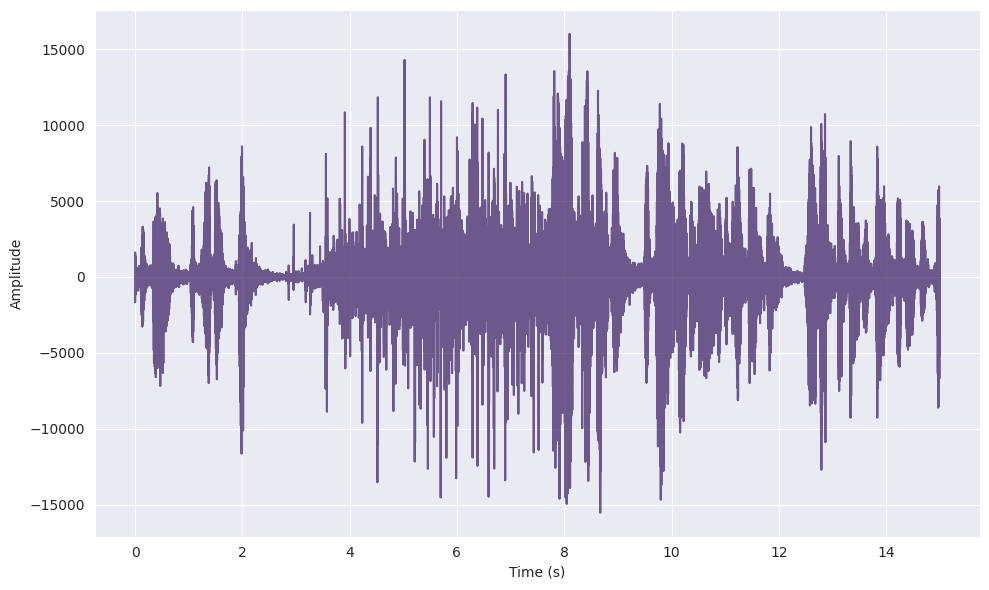

In [48]:
t = np.linspace(0, 15, sample_rate*15)  # Time vector for the continuous signal
plt.figure(figsize=(10, 6))
plt.plot(t[::10], waveform[::10], label="Analog Signal", color='#381a61', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.savefig('images/' + 'applause_waveform.pdf', dpi=300, bbox_inches='tight')
plt.show()